In [12]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
from pbo.utils.confidence_interval import confidence_interval

experiment_name = "test"
show_fqi = True; show_pbo_linear = True; show_pbo_custom_linear = True; 
show_pbo_deep = True; show_pbo_optimal = True
max_bellman_iterations = 3
max_bellman_iterations_validation = max_bellman_iterations + 6
seeds = range(1, 2)
iteration_bars = [max_bellman_iterations, max_bellman_iterations + 3, max_bellman_iterations +6]

p = json.load(open(f"figures/{experiment_name}/parameters.json"))

n_seeds = len(seeds)
ticks_freq = 2
n_actions = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Extract data

In [13]:
if show_fqi:
    fqi_w = np.zeros((len(seeds), max_bellman_iterations + 1, p["q_dim"]))
    fqi_v = np.zeros((len(seeds), max_bellman_iterations + 1))

    for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
        fqi_w[idx_seed] = np.load(f"figures/{experiment_name}/FQI/{max_bellman_iterations}_W_{seed}.npy")
        fqi_v[idx_seed] = np.load(f"figures/{experiment_name}/FQI/{max_bellman_iterations}_V_{seed}.npy")

optimal_w = np.load(f"figures/data/optimal/W.npy")[:p["q_dim"]]
optimal_v = np.load(f"figures/data/optimal/V.npy")

if show_pbo_linear:
    pbo_linear_w = np.zeros((len(seeds), max_bellman_iterations_validation + 2, p["q_dim"]))
    pbo_linear_v = np.zeros((len(seeds), max_bellman_iterations_validation + 2))

    for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
        pbo_linear_w[idx_seed] = np.load(f"figures/{experiment_name}/PBO_linear/{max_bellman_iterations}_W_{seed}.npy")
        pbo_linear_v[idx_seed] = np.load(f"figures/{experiment_name}/PBO_linear/{max_bellman_iterations}_V_{seed}.npy")

if show_pbo_custom_linear:
    pbo_custom_linear_w = np.zeros((len(seeds), max_bellman_iterations_validation + 1, p["q_dim"]))
    pbo_custom_linear_v = np.zeros((len(seeds), max_bellman_iterations_validation + 1))

    for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
        pbo_custom_linear_w[idx_seed] = np.load(
            f"figures/{experiment_name}/PBO_custom_linear/{max_bellman_iterations}_W_{seed}.npy"
        )
        pbo_custom_linear_v[idx_seed] = np.load(
            f"figures/{experiment_name}/PBO_custom_linear/{max_bellman_iterations}_V_{seed}.npy"
        )

if show_pbo_deep:
    pbo_deep_w = np.zeros((len(seeds), max_bellman_iterations_validation + 1, p["q_dim"]))
    pbo_deep_v = np.zeros((len(seeds), max_bellman_iterations_validation + 1))

    for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
        pbo_deep_w[idx_seed] = np.load(f"figures/{experiment_name}/PBO_deep/{max_bellman_iterations}_W_{seed}.npy")
        pbo_deep_v[idx_seed] = np.load(f"figures/{experiment_name}/PBO_deep/{max_bellman_iterations}_V_{seed}.npy")

if show_pbo_optimal:
    pbo_optimal_w = np.load(f"figures/{experiment_name}/PBO_optimal/{max_bellman_iterations}_W.npy")
    pbo_optimal_v = np.load(f"figures/{experiment_name}/PBO_optimal/{max_bellman_iterations}_V.npy")


### Distances with the optimal weights

In [14]:
if show_fqi:
    fqi_w_mean = np.sqrt(np.mean(np.square(fqi_w - optimal_w), axis=2)).mean(axis=0)
    fqi_w_std = np.sqrt(np.mean(np.square(fqi_w - optimal_w), axis=2)).std(axis=0)
    fqi_w_confidence_interval = confidence_interval(fqi_w_mean, fqi_w_std, len(seeds))

if show_pbo_linear:
    pbo_linear_w_mean = np.sqrt(np.mean(np.square(pbo_linear_w - optimal_w), axis=2)).mean(axis=0)
    pbo_linear_w_std = np.sqrt(np.mean(np.square(pbo_linear_w - optimal_w), axis=2)).std(axis=0)
    pbo_linear_w_confidence_interval = confidence_interval(pbo_linear_w_mean, pbo_linear_w_std, len(seeds))

if show_pbo_custom_linear:
    pbo_custom_linear_w_mean = np.sqrt(np.mean(np.square(pbo_custom_linear_w - optimal_w), axis=2)).mean(axis=0)
    pbo_custom_linear_w_std = np.sqrt(np.mean(np.square(pbo_custom_linear_w - optimal_w), axis=2)).std(axis=0)
    pbo_custom_linear_w_confidence_interval = confidence_interval(
        pbo_custom_linear_w_mean, pbo_custom_linear_w_std, len(seeds)
    )

if show_pbo_deep:
    pbo_deep_w_mean = np.sqrt(np.mean(np.square(pbo_deep_w - optimal_w), axis=2)).mean(axis=0)
    pbo_deep_w_std = np.sqrt(np.mean(np.square(pbo_deep_w - optimal_w), axis=2)).std(axis=0)
    pbo_deep_w_confidence_interval = confidence_interval(pbo_deep_w_mean, pbo_deep_w_std, len(seeds))

if show_pbo_optimal:
    pbo_optimal_w_mean = np.sqrt(np.mean(np.square(pbo_optimal_w - optimal_w), axis=1))


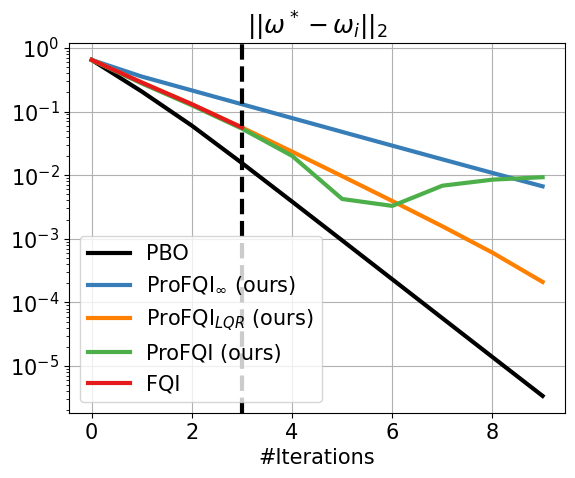

In [15]:
import matplotlib.pyplot as plt
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

if show_pbo_optimal:
    plt.plot(iterations_validation, pbo_optimal_w_mean, label="PBO", color="black")

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_w_mean[:-1], label="ProFQI$_{\infty}$ (ours)", color=colors["blue"])
    plt.fill_between(
        iterations_validation,
        pbo_linear_w_confidence_interval[0, :-1],
        pbo_linear_w_confidence_interval[1, :-1],
        color=colors["blue"],
        alpha=0.3,
    )

    # plt.hlines(
    #     pbo_linear_w_mean[-1],
    #     0,
    #     max_bellman_iterations_validation,
    #     color="blue",
    #     linestyle="--",
    #     label="linear PBO fixed point",
    # )
    # plt.fill_between(
    #     iterations_validation,
    #     pbo_linear_w_confidence_interval[0, -1],
    #     pbo_linear_w_confidence_interval[1, -1],
    #     color="blue",
    #     alpha=0.3,
    # )

if show_pbo_custom_linear:
    plt.plot(iterations_validation, pbo_custom_linear_w_mean, label="ProFQI$_{LQR}$ (ours)", color=colors["orange"])
    plt.fill_between(
        iterations_validation,
        pbo_custom_linear_w_confidence_interval[0],
        pbo_custom_linear_w_confidence_interval[1],
        color=colors["orange"],
        alpha=0.3,
    )

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_w_mean, label="ProFQI (ours)", color=colors["ProFQI"])
    plt.fill_between(
        iterations_validation,
        pbo_deep_w_confidence_interval[0],
        pbo_deep_w_confidence_interval[1],
        color=colors["ProFQI"],
        alpha=0.3,
    )

if show_fqi:
    plt.plot(iterations, fqi_w_mean, label="FQI", color=colors["FQI"])
    plt.fill_between(
        iterations, fqi_w_confidence_interval[0], fqi_w_confidence_interval[1], color=colors["FQI"], alpha=0.3
    )

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.yscale("log")
plt.title("$|| \omega^* - \omega_i ||_2$")
plt.legend().set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/W_{max_bellman_iterations}.pdf", bbox_inches="tight")


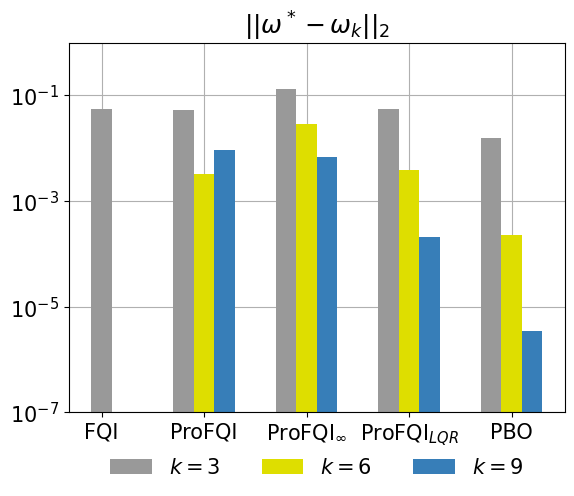

In [16]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

x_label = []
x_position = 0
bar_size = 0.2

if show_fqi:
    plt.bar([x_position], [fqi_w_mean[iteration_bars[0]]], width=bar_size, color=colors["grey"], zorder=2)
    x_position += 1
    x_label.append("FQI")

if show_pbo_deep:
    plt.bar([x_position - bar_size], [pbo_deep_w_mean[iteration_bars[0]]], width=bar_size, color=colors["grey"], zorder=2)
    plt.bar([x_position], [pbo_deep_w_mean[iteration_bars[1]]], width=bar_size, color=colors["yellow"], zorder=2)
    plt.bar([x_position + bar_size], [pbo_deep_w_mean[iteration_bars[2]]], width=bar_size, color=colors["blue"], zorder=2)
    x_position += 1
    x_label.append("ProFQI")

if show_pbo_linear:
    plt.bar([x_position - bar_size], [pbo_linear_w_mean[iteration_bars[0]]], width=bar_size, color=colors["grey"], zorder=2)
    plt.bar([x_position], [pbo_linear_w_mean[iteration_bars[1]]], width=bar_size, color=colors["yellow"], zorder=2)
    plt.bar([x_position + bar_size], [pbo_linear_w_mean[iteration_bars[2]]], width=bar_size, color=colors["blue"], zorder=2)
    x_position += 1
    x_label.append("ProFQI$_{\infty}$")

if show_pbo_custom_linear:
    plt.bar([x_position - bar_size], [pbo_custom_linear_w_mean[iteration_bars[0]]], width=bar_size, color=colors["grey"], zorder=2)
    plt.bar([x_position], [pbo_custom_linear_w_mean[iteration_bars[1]]], width=bar_size, color=colors["yellow"], zorder=2)
    plt.bar([x_position + bar_size], [pbo_custom_linear_w_mean[iteration_bars[2]]], width=bar_size, color=colors["blue"], zorder=2)
    x_position += 1
    x_label.append("ProFQI$_{LQR}$")

if show_pbo_optimal:
    plt.bar([x_position - bar_size], [pbo_optimal_w_mean[iteration_bars[0]]], width=bar_size, label=f"$k = {iteration_bars[0]}$", color=colors["grey"], zorder=2)
    plt.bar([x_position], [pbo_optimal_w_mean[iteration_bars[1]]], width=bar_size, label=f"$k = {iteration_bars[1]}$", color=colors["yellow"], zorder=2)
    plt.bar([x_position + bar_size], [pbo_optimal_w_mean[iteration_bars[2]]], width=bar_size, label=f"$k = {iteration_bars[2]}$", color=colors["blue"], zorder=2)
    x_position += 1
    x_label.append("PBO")

plt.title("$|| \omega^* - \omega_k ||_2$")
plt.xticks(range(x_position), x_label)
plt.yscale("log")
plt.ylim(1e-7, 1)
plt.legend(loc="center", bbox_to_anchor=(0.5, -0.15), ncol=len(iteration_bars), frameon=False)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/W_bar_{max_bellman_iterations}.pdf", bbox_inches='tight')

### Distance to optimal value function

In [17]:
if show_fqi:
    fqi_v_mean = np.abs(fqi_v - optimal_v).mean(axis=0)
    fqi_v_std = np.abs(fqi_v - optimal_v).std(axis=0)
    fqi_v_confidence_interval = confidence_interval(fqi_v_mean, fqi_v_std, len(seeds))

if show_pbo_linear:
    pbo_linear_v_mean = np.abs(pbo_linear_v - optimal_v).mean(axis=0)
    pbo_linear_v_std = np.abs(pbo_linear_v - optimal_v).std(axis=0)
    pbo_linear_v_confidence_interval = confidence_interval(pbo_linear_v_mean, pbo_linear_v_std, len(seeds))

if show_pbo_custom_linear:
    pbo_custom_linear_v_mean = np.abs(pbo_custom_linear_v - optimal_v).mean(axis=0)
    pbo_custom_linear_v_std = np.abs(pbo_custom_linear_v - optimal_v).std(axis=0)
    pbo_custom_linear_v_confidence_interval = confidence_interval(
        pbo_custom_linear_v_mean, pbo_custom_linear_v_std, len(seeds)
    )

if show_pbo_deep:
    pbo_deep_v_mean = np.abs(pbo_deep_v - optimal_v).mean(axis=0)
    pbo_deep_v_std = np.abs(pbo_deep_v - optimal_v).std(axis=0)
    pbo_deep_v_confidence_interval = confidence_interval(pbo_deep_v_mean, pbo_deep_v_std, len(seeds))

if show_pbo_optimal:
    pbo_optimal_v_mean = np.abs(pbo_optimal_v - optimal_v)


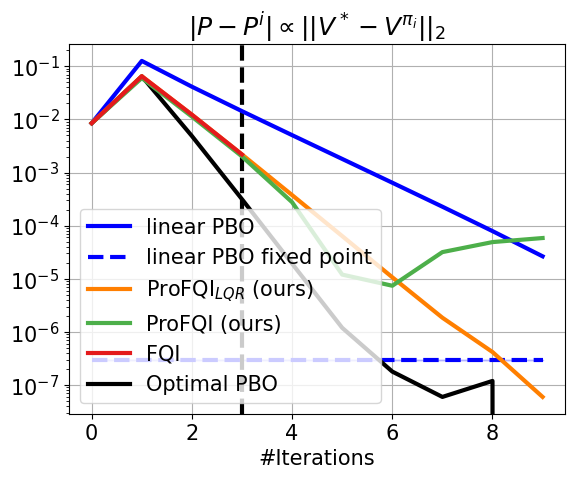

In [18]:
import matplotlib.pyplot as plt
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_v_mean[:-1], label="linear PBO", color="blue", zorder=7)
    plt.fill_between(
        iterations_validation,
        pbo_linear_v_confidence_interval[0, :-1],
        pbo_linear_v_confidence_interval[1, :-1],
        color="blue",
        alpha=0.3,
    )

    plt.hlines(
        pbo_linear_v_mean[-1],
        0,
        max_bellman_iterations_validation,
        color="blue",
        linestyle="--",
        label="linear PBO fixed point",
        zorder=3,
    )
    plt.fill_between(
        iterations_validation,
        pbo_linear_v_confidence_interval[0, -1],
        pbo_linear_v_confidence_interval[1, -1],
        color="blue",
        alpha=0.3,
    )

if show_pbo_custom_linear:
    plt.plot(
        iterations_validation, pbo_custom_linear_v_mean, label="ProFQI$_{LQR}$ (ours)", color=colors["orange"], zorder=8
    )
    plt.fill_between(
        iterations_validation,
        pbo_custom_linear_v_confidence_interval[0],
        pbo_custom_linear_v_confidence_interval[1],
        color=colors["orange"],
        alpha=0.3,
    )

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_v_mean, label="ProFQI (ours)", color=colors["ProFQI"], zorder=8)
    plt.fill_between(
        iterations_validation,
        pbo_deep_v_confidence_interval[0],
        pbo_deep_v_confidence_interval[1],
        color=colors["ProFQI"],
        alpha=0.3,
    )

if show_fqi:
    plt.plot(iterations, fqi_v_mean, label="FQI", color=colors["FQI"], zorder=9)
    plt.fill_between(
        iterations, fqi_v_confidence_interval[0], fqi_v_confidence_interval[1], color=colors["FQI"], alpha=0.3
    )

if show_pbo_optimal:
    plt.plot(iterations_validation, pbo_optimal_v_mean, label="Optimal PBO", color="black", zorder=4)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.yscale("log")
plt.title("$|P - P^i| \propto || V^* - V^{\pi_i} ||_2$")
plt.legend().set_zorder(10)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/V_{max_bellman_iterations}.pdf", bbox_inches="tight")


## Visualise

In [19]:
if p["q_dim"] == 3:
    import matplotlib.pyplot as plt
    from experiments import colors

    plt.rc("font", size=15)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    if show_pbo_linear:
        ax.scatter(
            pbo_linear_w[0, :, 0],
            pbo_linear_w[0, :, 1],
            pbo_linear_w[0, :, 2],
            label="linear PBO",
            color="blue",
            s=200,
            zorder=4,
        )
    if show_pbo_custom_linear:
        ax.scatter(
            pbo_custom_linear_w[0, :, 0],
            pbo_custom_linear_w[0, :, 1],
            pbo_custom_linear_w[0, :, 2],
            label="ProFQI$_{LQR}$ (ours)",
            color=colors["orange"],
            s=200,
            zorder=5,
            marker="s",
        )
    if show_pbo_deep:
        ax.scatter(
            pbo_deep_w[0, :, 0],
            pbo_deep_w[0, :, 1],
            pbo_deep_w[0, :, 2],
            label="ProFQI (ours)",
            color=colors["ProFQI"],
            s=200,
            zorder=5,
            marker="^",
        )
    if show_fqi:
        ax.scatter(fqi_w[0, :, 0], fqi_w[0, :, 1], fqi_w[0, :, 2], label="FQI", color=colors["FQI"], s=200, zorder=2)
    # ax.scatter(pbo_optimal_w[:, 0], pbo_optimal_w[:, 1], pbo_optimal_w[:, 2], label='PBO', color="black", s=np.linspace(100, 10, max_bellman_iterations_validation + 1), zorder=1)
    ax.scatter(
        optimal_w[0], optimal_w[1], optimal_w[2], label="optimal parameters", color="black", marker="*", s=800, zorder=0
    )

    plt.legend(bbox_to_anchor=(0.5, 0.4))
    ax.view_init(20, 35)
    ax.set_xlabel("G", labelpad=10)
    ax.set_xticks(np.linspace(-0.8, 0, 3), labels=np.around(np.linspace(-0.8, 0, 3), 1))
    ax.set_ylabel("I", labelpad=10)
    ax.set_yticks(np.linspace(-0.3, 0, 4), labels=np.around(np.linspace(-0.3, 0, 4), 1))
    ax.set_zlabel("M")
    ax.set_zticks(np.linspace(-1.2, 0, 4), labels=np.around(np.linspace(-1.2, 0, 4), 1))
    ax.set_box_aspect([1, 1, 1])
    _ = plt.savefig(f"figures/{experiment_name}/visu_3D_{max_bellman_iterations}.pdf", bbox_inches="tight")


In [20]:
if p["q_dim"] == 3:
    import matplotlib.pyplot as plt

    plt.rc("font", size=15)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    start_iteration = max_bellman_iterations

    if show_pbo_linear:
        ax.scatter(
            pbo_linear_w[0, start_iteration:, 0],
            pbo_linear_w[0, start_iteration:, 1],
            pbo_linear_w[0, start_iteration:, 2],
            color=colors["blue"],
            s=200,
            zorder=4,
        )
    if show_pbo_custom_linear:
        ax.scatter(
            pbo_custom_linear_w[0, start_iteration:, 0],
            pbo_custom_linear_w[0, start_iteration:, 1],
            pbo_custom_linear_w[0, start_iteration:, 2],
            color=colors["orange"],
            s=200,
            zorder=5,
            marker="s",
        )
    if show_pbo_deep:
        ax.scatter(
            pbo_deep_w[0, start_iteration:, 0],
            pbo_deep_w[0, start_iteration:, 1],
            pbo_deep_w[0, start_iteration:, 2],
            color=colors["ProFQI"],
            s=200,
            zorder=5,
            marker="^",
        )
    if show_fqi:
        ax.scatter(
            fqi_w[0, start_iteration:, 0],
            fqi_w[0, start_iteration:, 1],
            fqi_w[0, start_iteration:, 2],
            color=colors["FQI"],
            s=200,
            zorder=2,
        )
    # ax.scatter(pbo_optimal_w[:, 0], pbo_optimal_w[:, 1], pbo_optimal_w[:, 2], label='PBO', color="black", s=np.linspace(100, 10, max_bellman_iterations_validation + 1), zorder=1)
    ax.scatter(
        optimal_w[0], optimal_w[1], optimal_w[2], label="optimal parameters", color="black", marker="*", s=500, zorder=0
    )

    ax.view_init(20, 35)
    ax.set_xlabel("G", labelpad=10)
    ax.set_xticks(np.linspace(-0.92, -0.90, 3), labels=np.around(np.linspace(-0.92, -0.90, 3), 2))
    ax.set_ylabel("I", labelpad=10)
    ax.set_yticks(np.linspace(-0.11, -0.09, 4), labels=np.around(np.linspace(-0.11, -0.09, 4), 2))
    ax.set_zlabel("M")
    ax.set_zticks(np.linspace(-1.21, -1.18, 4), labels=np.around(np.linspace(-1.21, -1.18, 4), 2))
    ax.set_box_aspect([1, 1, 1])
    _ = plt.savefig(f"figures/{experiment_name}/visu_3D_zoom_{max_bellman_iterations}.pdf", bbox_inches="tight")


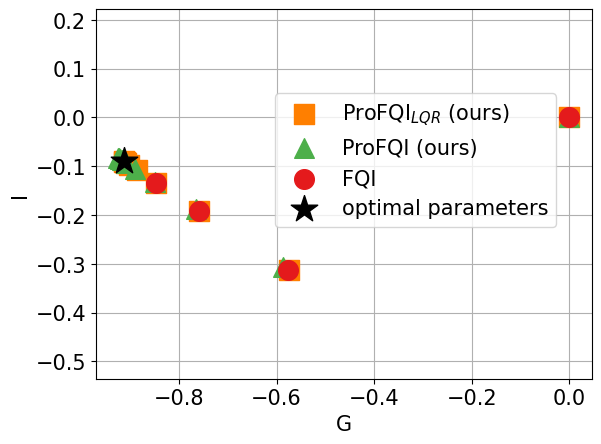

In [21]:
if p["q_dim"] == 2:
    import matplotlib.pyplot as plt
    from experiments import colors

    plt.rc("font", size=15)
    plt.rc("lines", linewidth=3)

    if show_pbo_linear and False:
        plt.scatter(
            pbo_linear_w[0, :, 0],
            pbo_linear_w[0, :, 1],
            label="ProFQI$_{\infty}$ (ours)",
            color=colors["blue"],
            s=200,
            zorder=4,
        )
    if show_pbo_custom_linear:
        plt.scatter(
            pbo_custom_linear_w[0, :, 0],
            pbo_custom_linear_w[0, :, 1],
            label="ProFQI$_{LQR}$ (ours)",
            color=colors["orange"],
            s=200,
            zorder=5,
            marker="s",
        )
    if show_pbo_deep:
        plt.scatter(
            pbo_deep_w[0, :, 0],
            pbo_deep_w[0, :, 1],
            label="ProFQI (ours)",
            color=colors["ProFQI"],
            s=200,
            zorder=5,
            marker="^",
        )
    if show_fqi:
        plt.scatter(fqi_w[0, :, 0], fqi_w[0, :, 1], label="FQI", color=colors["FQI"], s=200, zorder=6)
    # plt.scatter(pbo_optimal_w[:, 0], pbo_optimal_w[:, 1], pbo_optimal_w[:, 2], label='PBO', color="black", s=np.linspace(100, 10, mplt_bellman_iterations_validation + 1), zorder=1)
    plt.scatter(
        optimal_w[0], optimal_w[1], label="optimal parameters", color="black", marker="*", s=400, zorder=6
    )

    # plt.legend()
    plt.legend(bbox_to_anchor=(0.34, 0.8))
    plt.xlabel("G")
    # plt.set_xticks(np.linspace(-0.8, 0, 3), labels=np.around(np.linspace(-0.8, 0, 3), 1))
    plt.ylabel("I")
    # plt.set_yticks(np.linspace(-0.3, 0, 4), labels=np.around(np.linspace(-0.3, 0, 4), 1))
    plt.axis('equal')
    plt.grid(zorder=0)
    _ = plt.savefig(f"figures/{experiment_name}/visu_2D_{max_bellman_iterations}.pdf", bbox_inches="tight")


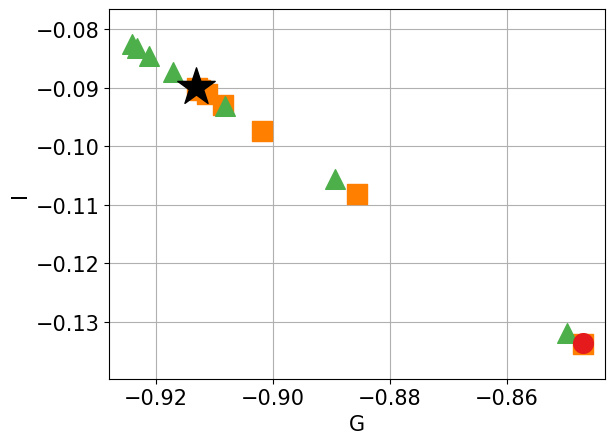

In [22]:
if p["q_dim"] == 2:
    import matplotlib.pyplot as plt

    plt.rc("font", size=15)

    start_iteration = max_bellman_iterations

    if show_pbo_linear and False:
        plt.scatter(
            pbo_linear_w[0, start_iteration:, 0],
            pbo_linear_w[0, start_iteration:, 1],
            color=colors["blue"],
            s=200,
            zorder=4,
        )
    if show_pbo_custom_linear:
        plt.scatter(
            pbo_custom_linear_w[0, start_iteration:, 0],
            pbo_custom_linear_w[0, start_iteration:, 1],
            color=colors["orange"],
            s=200,
            zorder=5,
            marker="s",
        )
    if show_pbo_deep:
        plt.scatter(
            pbo_deep_w[0, start_iteration:, 0],
            pbo_deep_w[0, start_iteration:, 1],
            color=colors["ProFQI"],
            s=200,
            zorder=5,
            marker="^",
        )
    if show_fqi:
        plt.scatter(
            fqi_w[0, start_iteration:, 0],
            fqi_w[0, start_iteration:, 1],
            color=colors["FQI"],
            s=200,
            zorder=6,
        )
    # plt.scatter(pbo_optimal_w[:, 0], pbo_optimal_w[:, 1], pbo_optimal_w[:, 2], label='PBO', color="black", s=np.linspace(100, 10, max_bellman_iterations_validation + 1), zorder=1)
    plt.scatter(
        optimal_w[0], optimal_w[1], label="optimal parameters", color="black", marker="*", s=800, zorder=6
    )

    plt.xlabel("G")
    # plt.xticks(np.linspace(-0.90, -0.77, 6), labels=np.around(np.linspace(-0.90, -0.77, 6), 2))
    plt.ylabel("I")
    # plt.set_yticks(np.linspace(-0.11, -0.09, 4), labels=np.around(np.linspace(-0.11, -0.09, 4), 2))
    plt.axis('equal')
    plt.grid(zorder=0)
    _ = plt.savefig(f"figures/{experiment_name}/visu_2D_zoom_{max_bellman_iterations}.pdf", bbox_inches="tight")
